<a href="https://colab.research.google.com/github/cmlohr/research_data/blob/add-license-1/Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

In [1]:
# %pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 7.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

# Reading the Data

In [7]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

In [8]:
df_data.shape

(962, 16)

In [9]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


In [10]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### Check for Duplicates

In [11]:
print(f'Duplicates: {df_data.duplicated().values.any()}')

Duplicates: False


In [12]:
print(f'NaN values: {df_data.isna().values.any()}')

NaN values: True


### Check for NaN Values

In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [15]:
col_subset = ['year', 'category', 'laureate_type', 'full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


# Convert Year and Birth Date to Datetime

In [16]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

# Add a Column with the Prize Share as a Percentage

In [18]:
new_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(new_values[0])
denomenator = pd.to_numeric(new_values[1])
df_data['share_pct'] = numerator / denomenator

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [21]:
bio = df_data.sex.value_counts()

my_chart = px.pie(labels=bio.index, 
                  values=bio.values,
                  title="Male Vs Female Winners by %", 
                  names=bio.index, hole=.5,)

my_chart.update_traces(textposition='inside', textfont_size=18, textinfo='percent')
my_chart.show()

# First Three Women to Win the Nobel Prize


In [22]:
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Repeat Winners


In [23]:
winner_cat = df_data.duplicated(subset=['full_name'], keep=False)
winners = df_data[winner_cat]
print(f'There are {winners.full_name.nunique()} repeat winners.')

There are 6 repeat winners.


In [24]:
cat_subset = ['year', 'category', 'laureate_type', 'full_name']
winners[cat_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

In [25]:
df_data.category.nunique()

6

In [27]:
nbp_cat = df_data.category.value_counts()
vert_bar = px.bar(
    x = nbp_cat.index,
    y=nbp_cat.values,
    color = nbp_cat.values,
    color_continuous_scale='Aggrnyl',
    title='Num of Prizes per Cat')
vert_bar.update_layout(xaxis_title='Nobel Prize Cat',
                       coloraxis_showscale=False,
                       yaxis_title='Num of Prizes')
vert_bar.show()

In [35]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


In [46]:
men_women_cat = df_data.groupby(['category', 'sex'], 
                                as_index=False).agg({'prize': pd.Series.count})
men_women_cat.sort_values('prize', ascending=False, inplace=True)

vert_bar_split = px.bar(x = men_women_cat.category,
                      y = men_women_cat.prize,
                      color = men_women_cat.sex,
                      title='Num of Prizes Awarded per Category split by Men & Women')
  
vert_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
vert_bar_split.show()

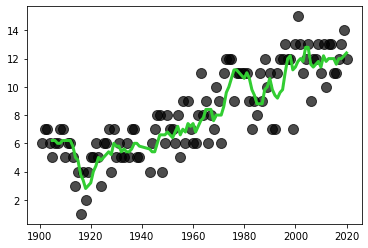

In [53]:
prize_per_year = df_data.groupby(by='year').count().prize
moving_average = prize_per_year.rolling(window=5).mean()
plt.scatter(x=prize_per_year.index, 
            y=prize_per_year.values, 
            c='black',
            alpha=0.7,
            s=100,)
  
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='limegreen', 
        linewidth=3,)
  
plt.show()

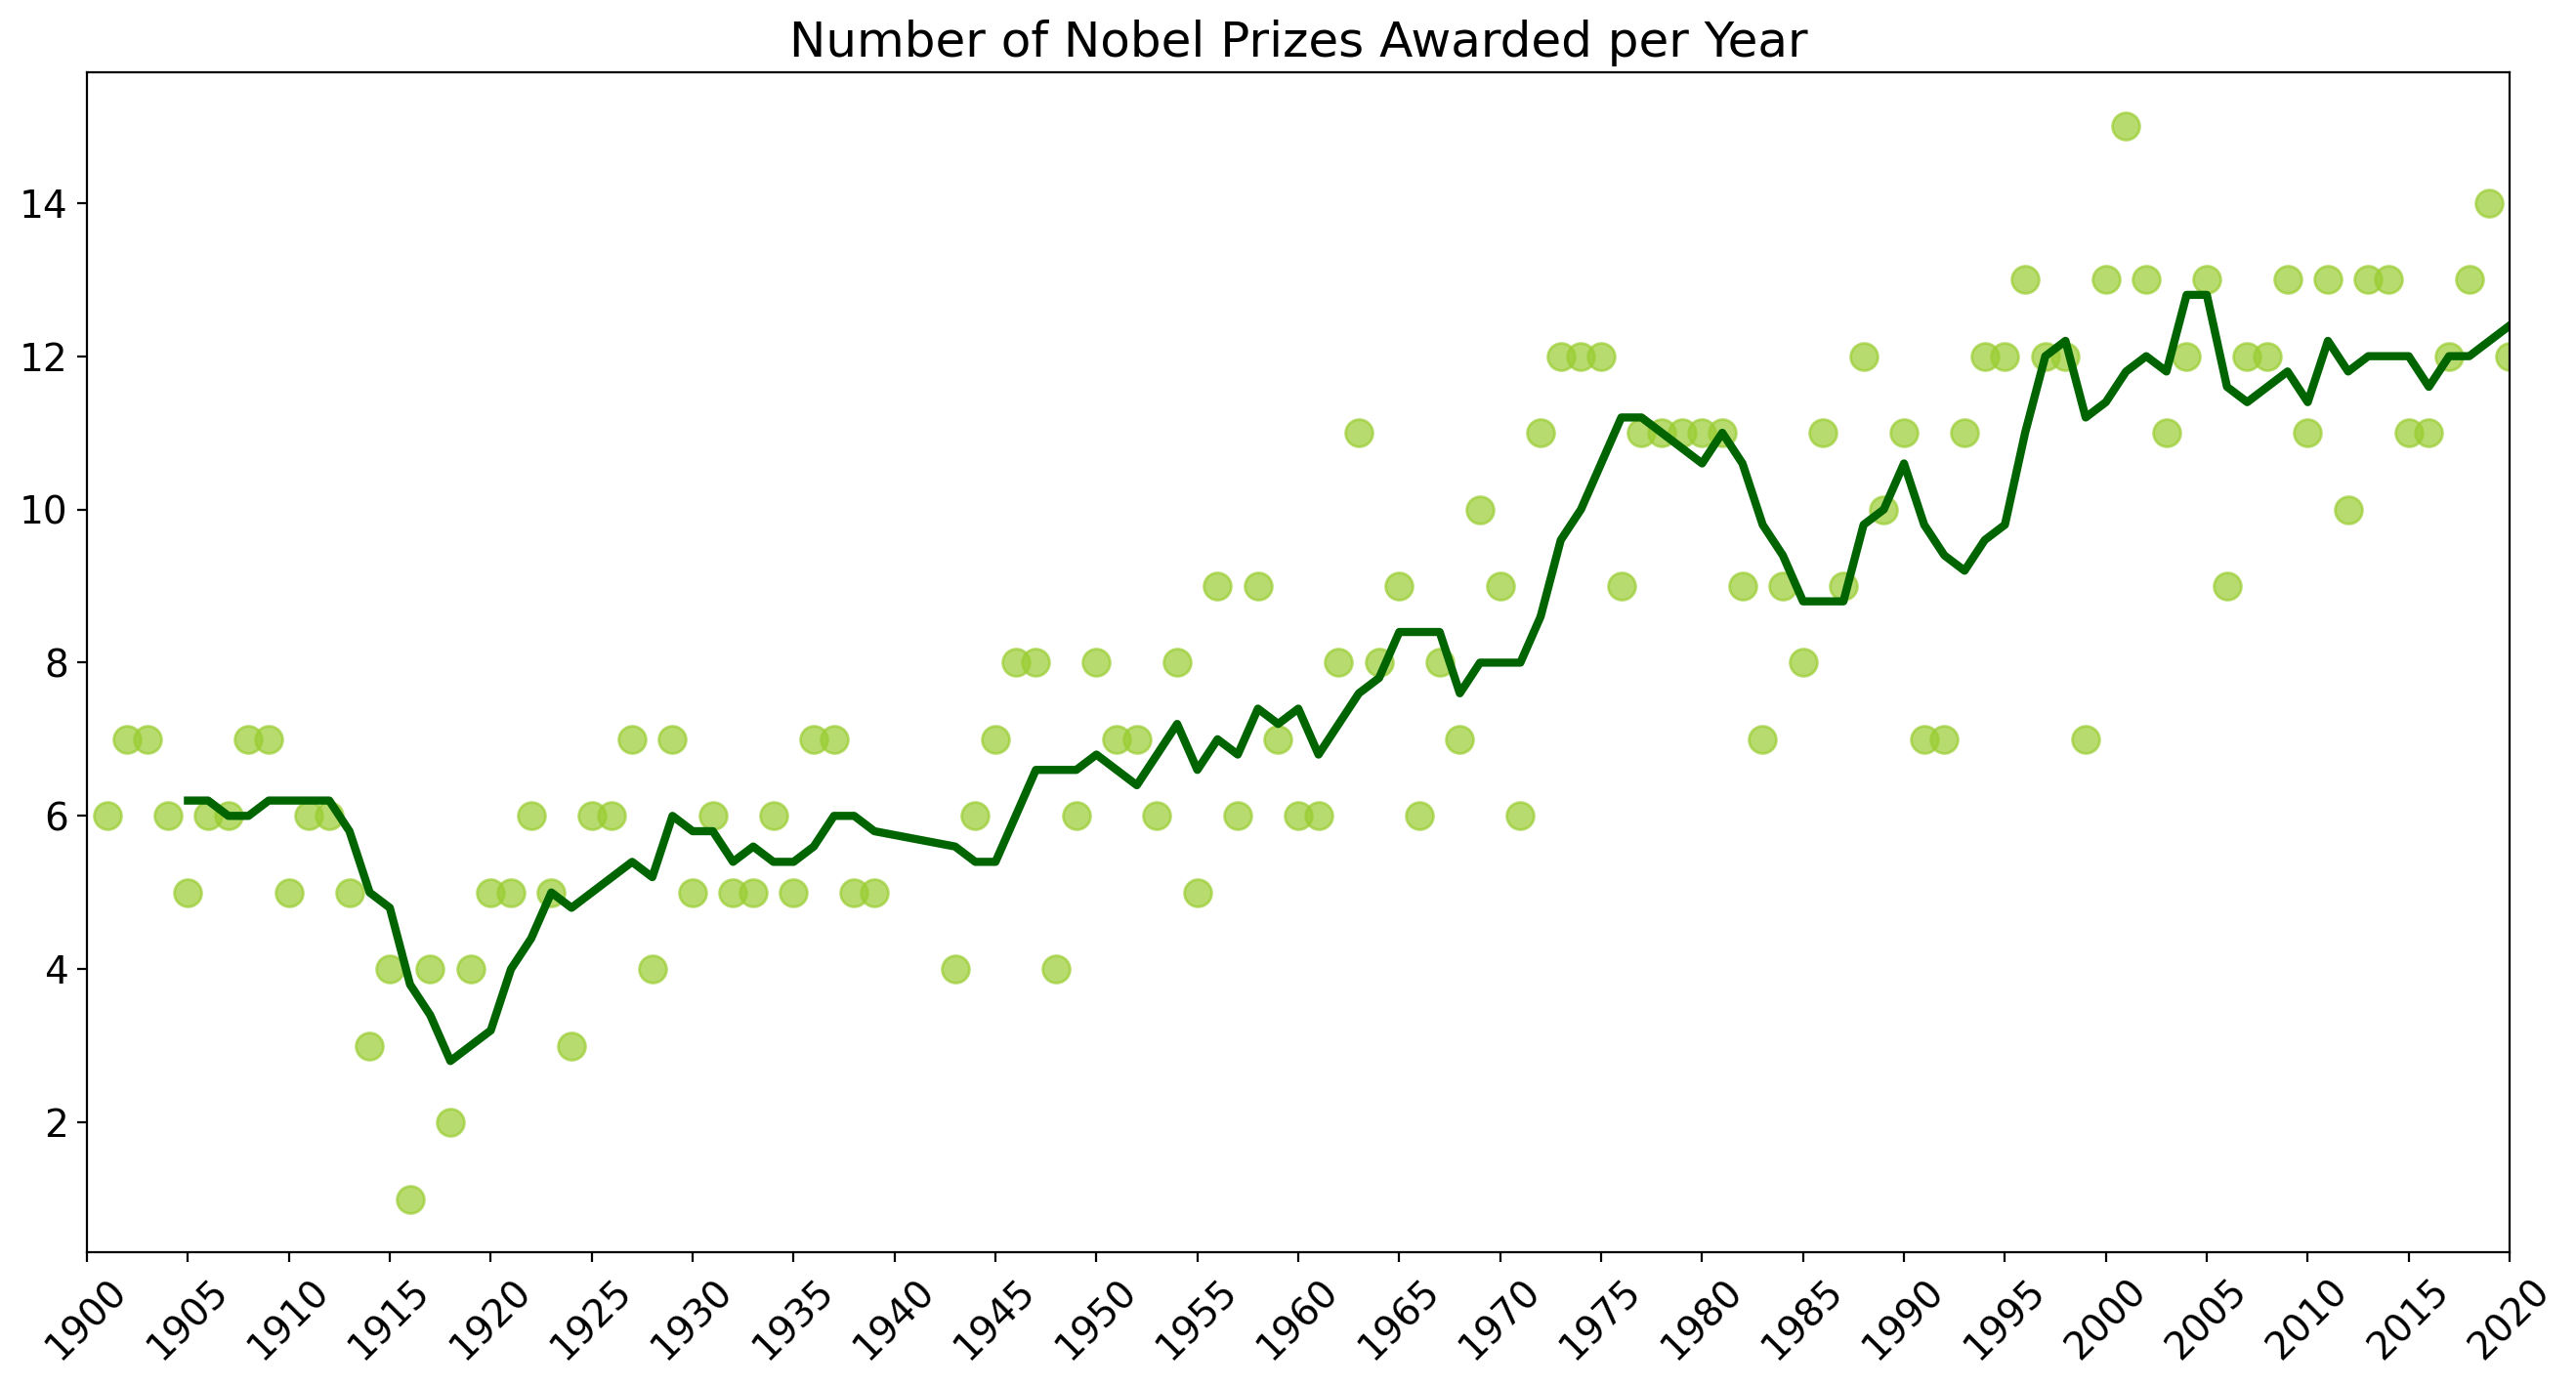

In [56]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax = plt.gca() # get current axis
    ax.set_xlim(1900, 2020)
     
    ax.scatter(x=prize_per_year.index, 
               y=prize_per_year.values, 
               c='yellowgreen',
               alpha=0.7,
               s=100,)
     
    ax.plot(prize_per_year.index, 
            moving_average.values, 
            c='darkgreen', 
            linewidth=3,)
     
    plt.show()

In [57]:
    yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
    share_moving_average = yearly_avg_share.rolling(window=5).mean()

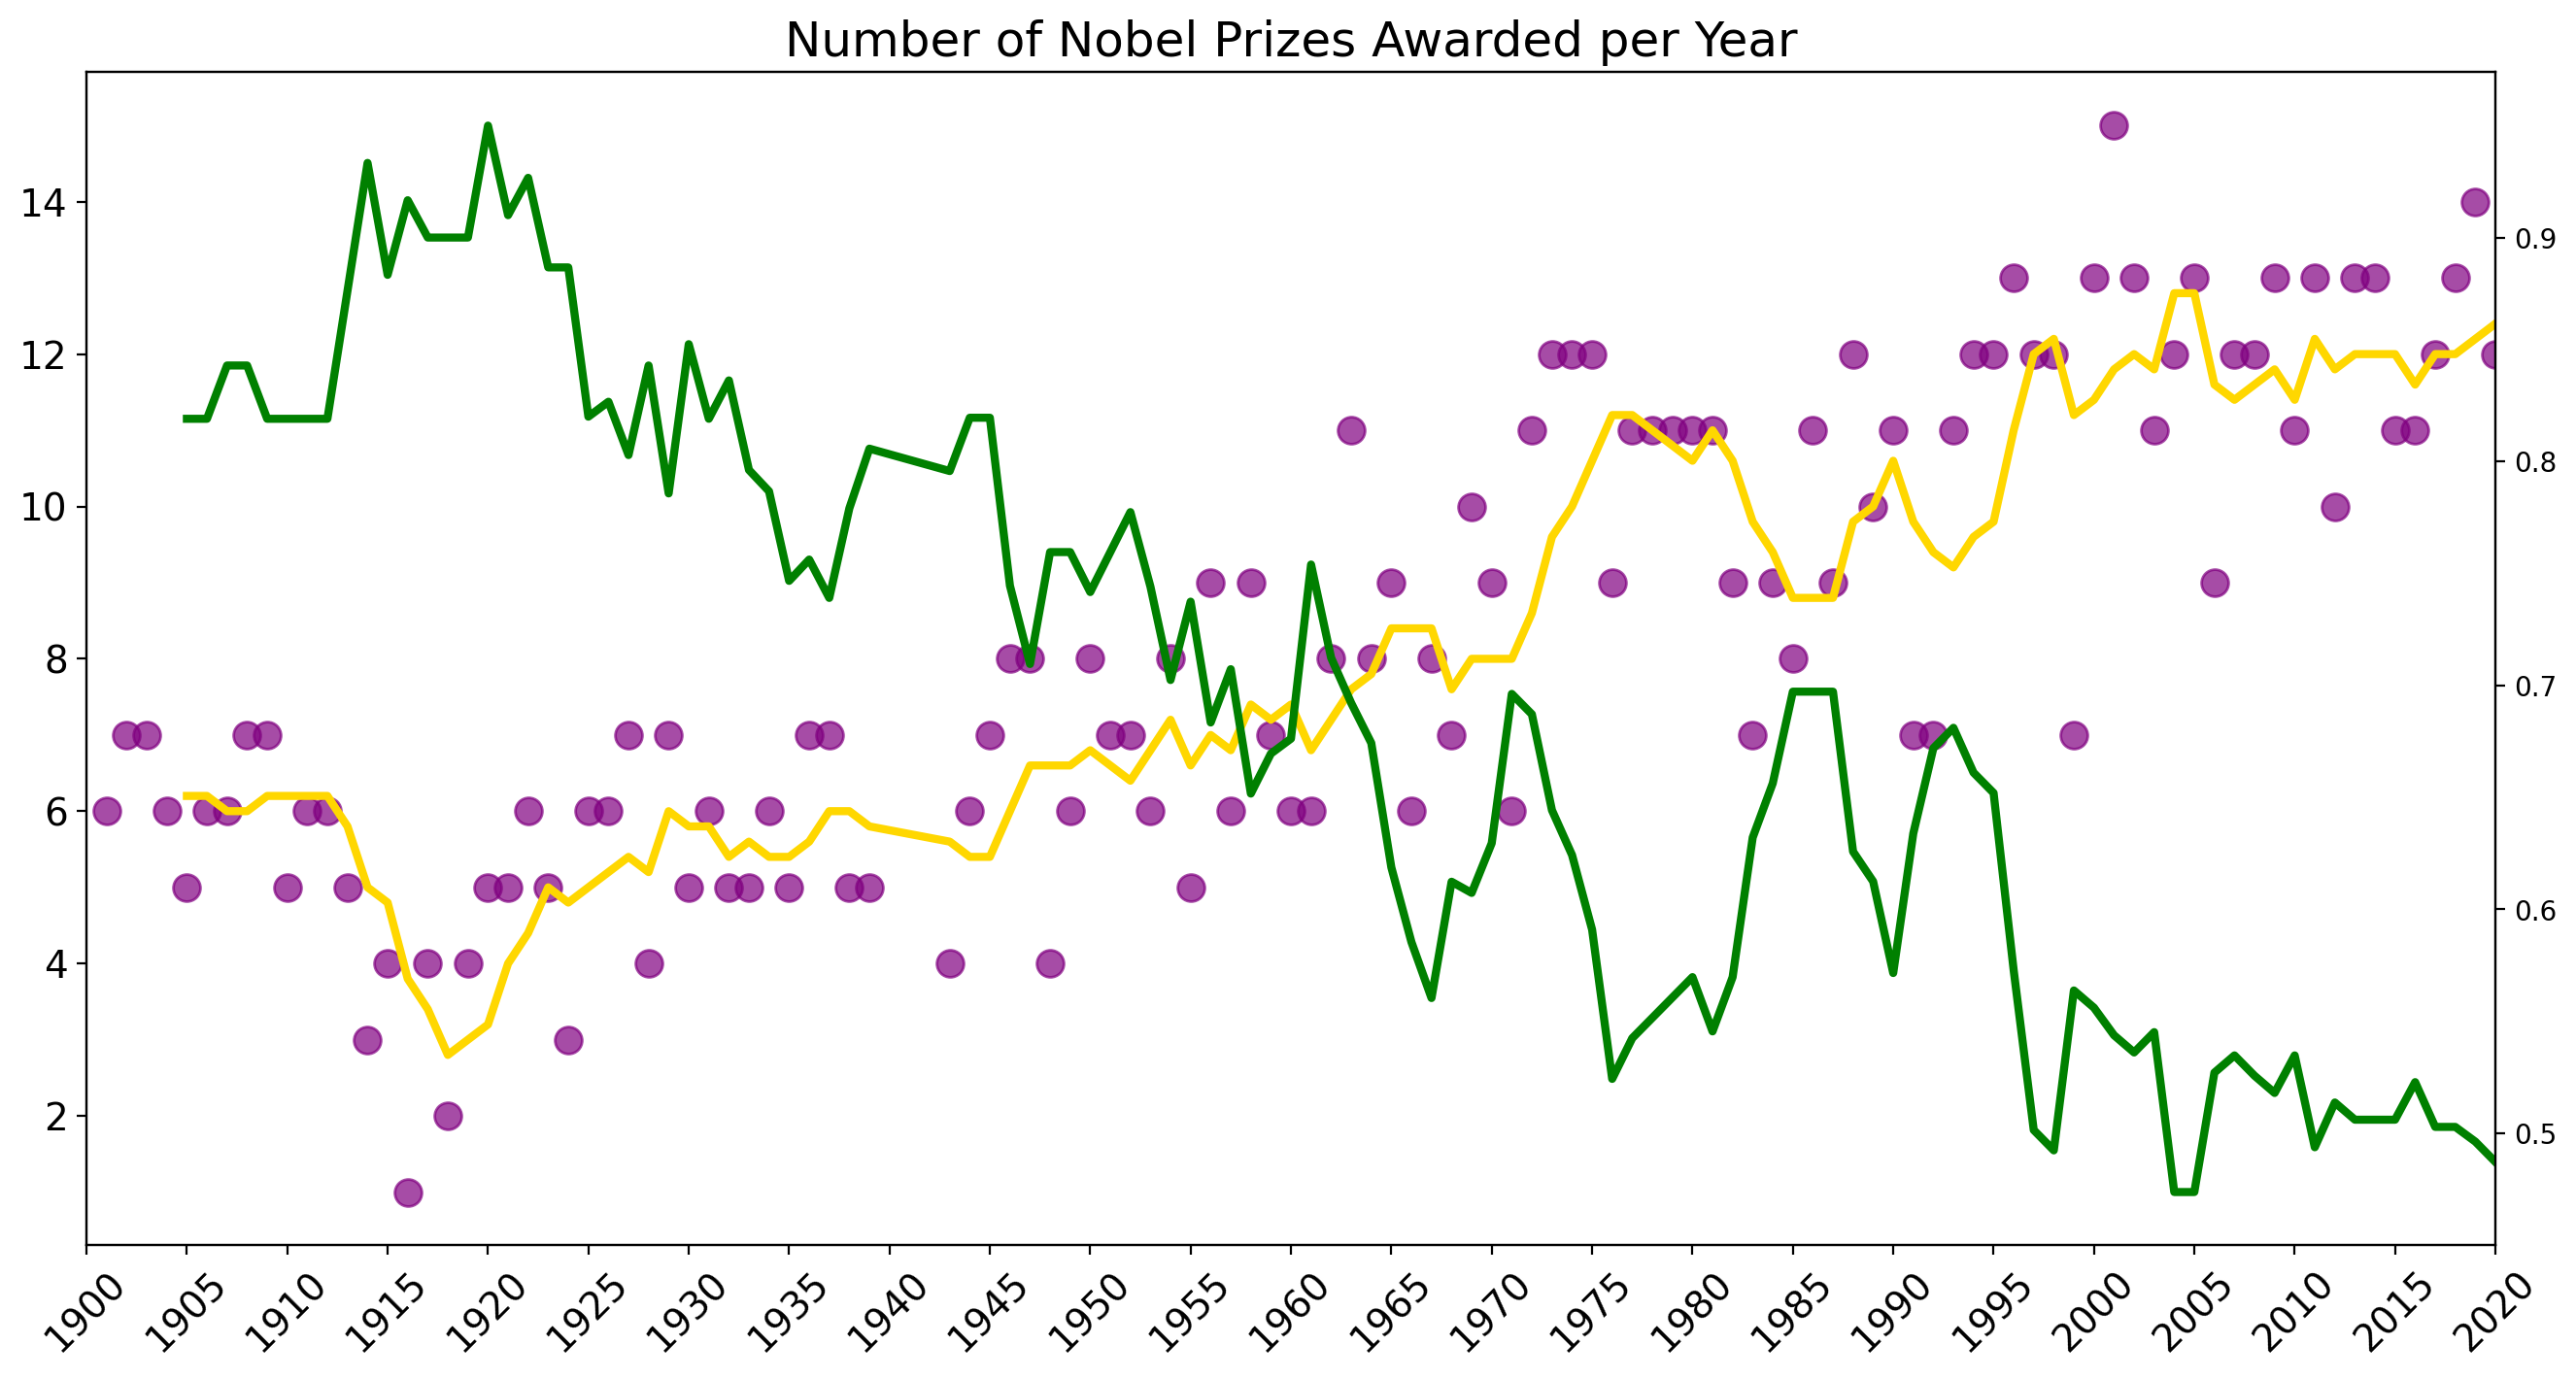

In [61]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax1 = plt.gca()
    ax2 = ax1.twinx() # create second y-axis
    ax1.set_xlim(1900, 2020)
     
    ax1.scatter(x=prize_per_year.index, 
               y=prize_per_year.values, 
               c='purple',
               alpha=0.7,
               s=100,)
     
    ax1.plot(prize_per_year.index, 
            moving_average.values, 
            c='gold', 
            linewidth=3,)
     
    # Adding prize share plot on second axis
    ax2.plot(prize_per_year.index, 
            share_moving_average.values, 
            c='green', 
            linewidth=3,)
     
    plt.show()

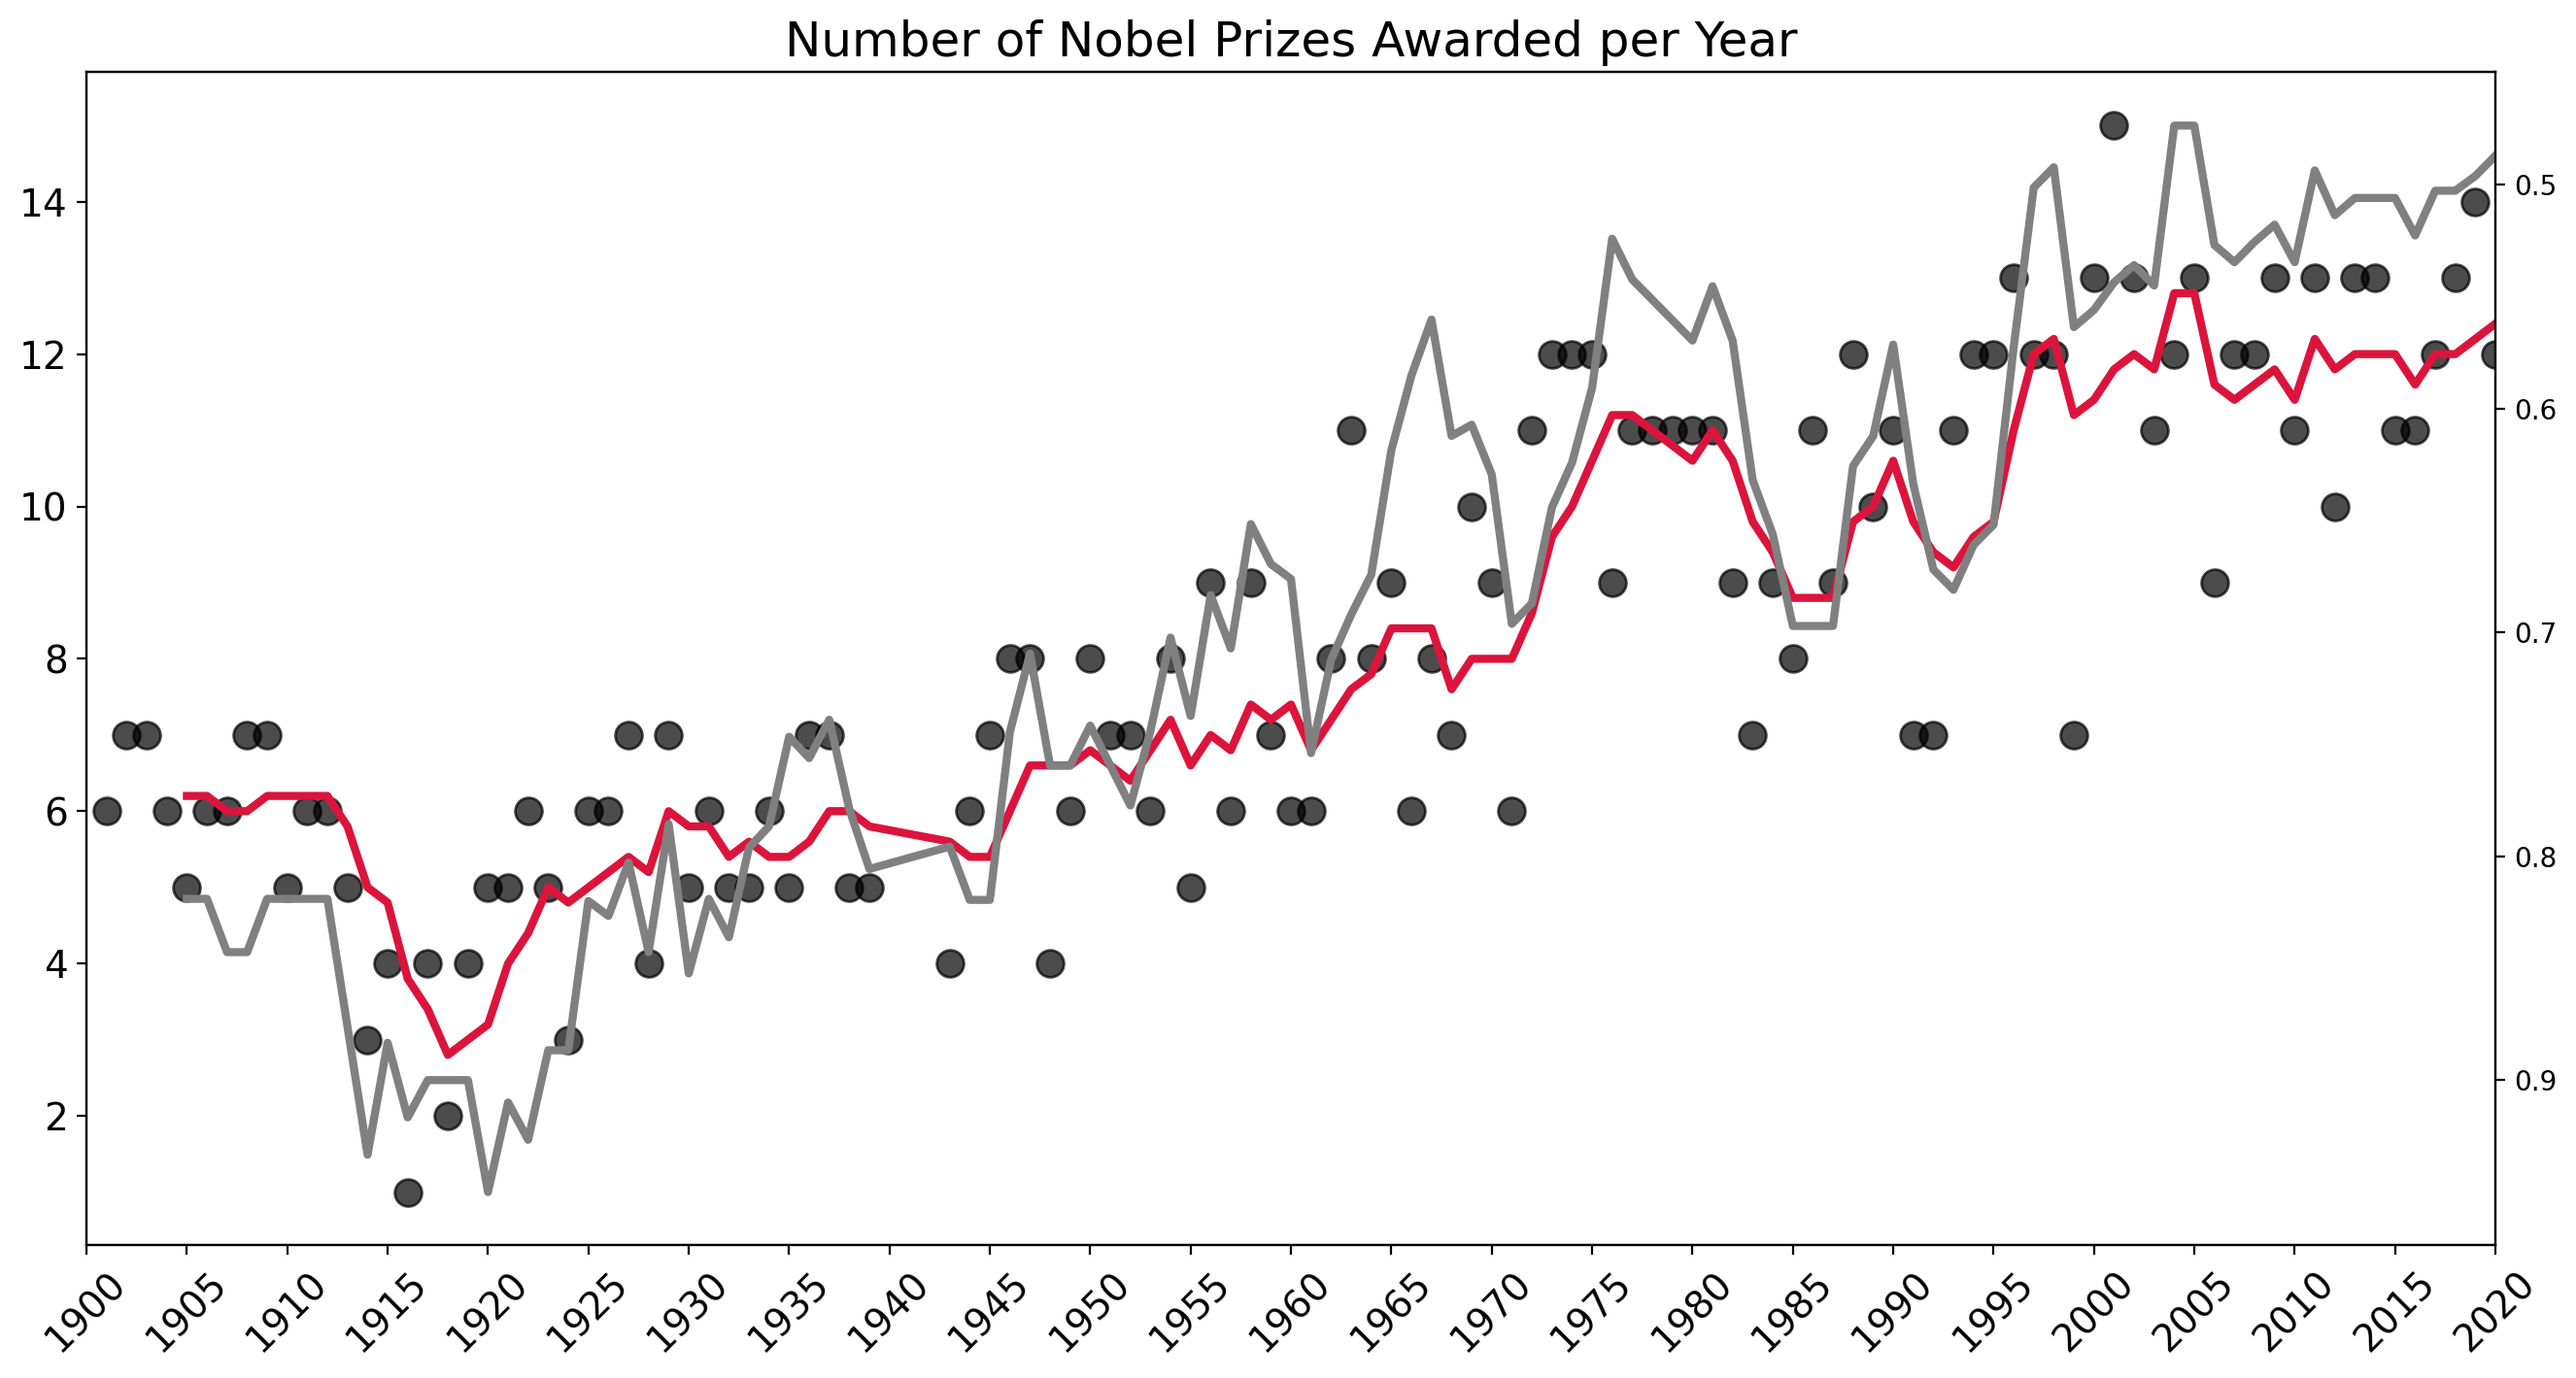

In [62]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.set_xlim(1900, 2020)
     
    # Can invert axis
    ax2.invert_yaxis()
     
    ax1.scatter(x=prize_per_year.index, 
               y=prize_per_year.values, 
               c='black',
               alpha=0.7,
               s=100,)
     
    ax1.plot(prize_per_year.index, 
            moving_average.values, 
            c='crimson', 
            linewidth=3,)
     
    ax2.plot(prize_per_year.index, 
            share_moving_average.values, 
            c='grey', 
            linewidth=3,)
     
    plt.show()

In [64]:
head_countries = df_data.groupby(['birth_country_current'],
                                 as_index=False).agg({'prize': pd.Series.count})
                                 
                                 
head_countries.sort_values(by='prize', inplace=True)

sample_twenty = head_countries[-20:]

hor_bar_birth = px.bar(x=sample_twenty.prize,
                y=sample_twenty.birth_country_current,
                orientation='h',
                color=sample_twenty.prize,
                color_continuous_scale='Viridis',
                title='Top 20 Countries by Number of Prizes')
  
hor_bar_birth.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
hor_bar_birth.show()

In [65]:
country_list = df_data.groupby(['birth_country_current', 'ISO'], 
                            as_index=False).agg({'prize': pd.Series.count})
country_list.sort_values('prize', ascending=False)

world_map = px.choropleth(country_list,
                      locations='ISO',
                      color='prize', 
                      hover_name='birth_country_current', 
                      color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

In [70]:
countries = df_data.groupby(['birth_country_current', 'category'],
                            as_index=False).agg({'prize': pd.Series.count})
countries.sort_values(by='prize', ascending=False, inplace=True)
merged_df = pd.merge(countries, sample_twenty, on='birth_country_current')

merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

country_bar_chart = px.bar(x=merged_df.cat_prize,
                        y=merged_df.birth_country_current,
                        color=merged_df.category,
                        orientation='h',
                        title='Top 20 Countries by Number of Prizes and Category')
  
country_bar_chart.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
country_bar_chart.show()

In [73]:
prize_each_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_each_year = prize_each_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
total_prizes = prize_each_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
total_prizes.reset_index(inplace=True) 
l_chart = px.line(total_prizes,
              x='year', 
              y='prize',
              color='birth_country_current',
              hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Prizes')

l_chart.show()

In [74]:
top_organizations = df_data.organization_name.value_counts()[:20]
top_organizations.sort_values(ascending=True, inplace=True)
organization_bar = px.bar(x = top_organizations.values,
              y = top_organizations.index,
              orientation='h',
              color=top_organizations.values,
              color_continuous_scale=px.colors.sequential.haline,
              title='Top 20 Research Institutions by Number of Prizes')

organization_bar.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='Institution',
                  coloraxis_showscale=False)
organization_bar.show()

In [75]:
    top_cities = df_data.organization_city.value_counts()[:20]
    top_cities.sort_values(ascending=True, inplace=True)
    top_city_bar_chart_2 = px.bar(x = top_cities.values,
                      y = top_cities.index,
                      orientation='h',
                      color=top_cities.values,
                      color_continuous_scale=px.colors.sequential.Plasma,
                      title='Which Cities Do the Most Research?')
     
    top_city_bar_chart_2.update_layout(xaxis_title='Number of Prizes', 
                           yaxis_title='City',
                           coloraxis_showscale=False)
    top_city_bar_chart_2.show()

In [76]:
    top_cities = df_data.birth_city.value_counts()[:20]
    top_cities.sort_values(ascending=True, inplace=True)
    top_city_bar_chart = px.bar(x=top_cities.values,
                      y=top_cities.index,
                      orientation='h',
                      color=top_cities.values,
                      color_continuous_scale=px.colors.sequential.Plasma,
                      title='Where were the Nobel Laureates Born?')
     
    top_city_bar_chart.update_layout(xaxis_title='Number of Prizes', 
                           yaxis_title='City of Birth',
                           coloraxis_showscale=False)
    top_city_bar_chart.show()

In [77]:
organization_data = df_data.groupby(by=['organization_country', 
                                    'organization_city', 
                                    'organization_name'], as_index=False).agg({'prize': pd.Series.count})

organization_data = organization_data.sort_values('prize', ascending=False)
burst_plot = px.sunburst(organization_data, 
                path=['organization_country', 'organization_city', 'organization_name'], 
                values='prize',
                title='Where do Discoveries Take Place?',
                )

burst_plot.update_layout(xaxis_title='Number of Prizes', 
                yaxis_title='City',
                coloraxis_showscale=False)

burst_plot.show()

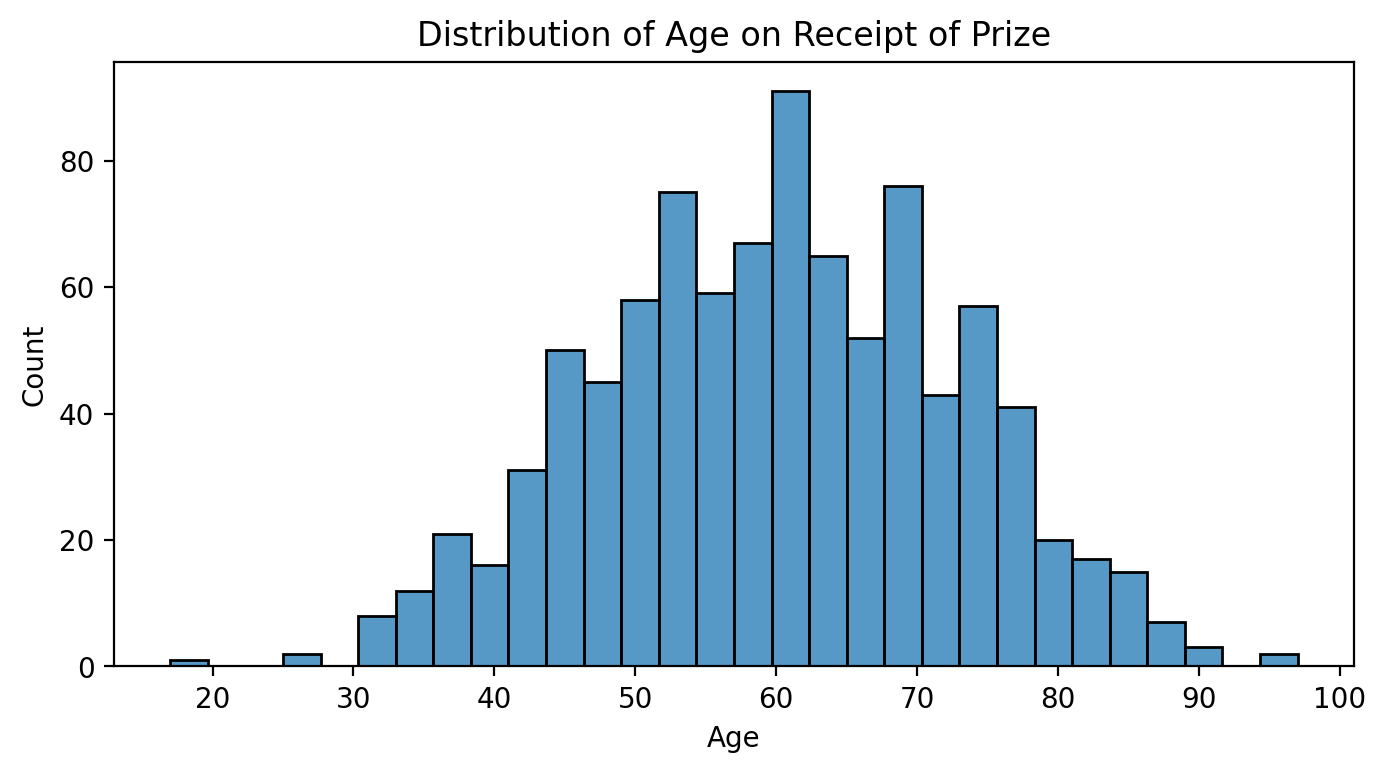

In [79]:
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
              x=df_data.winning_age,
              bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

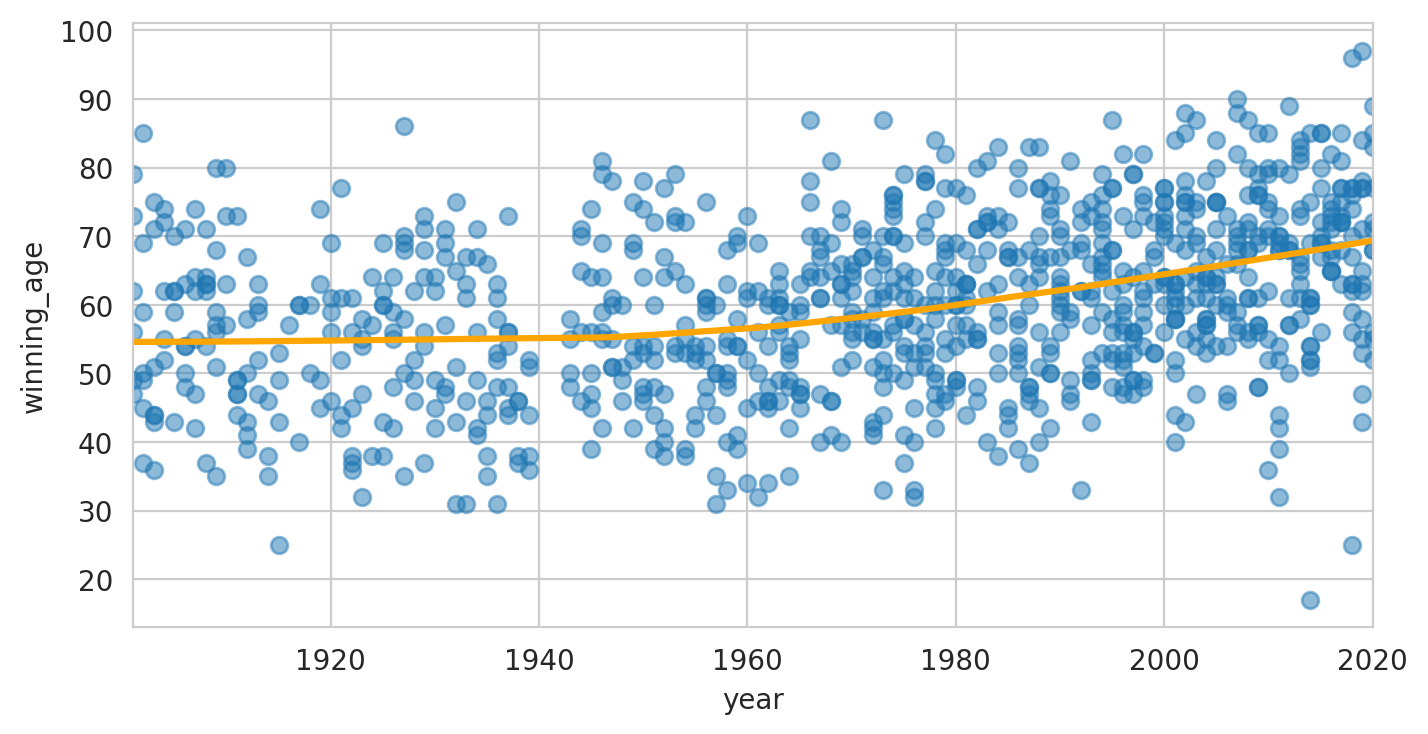

In [82]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=df_data,
              x='year',
              y='winning_age',
              lowess=True, 
              scatter_kws = {'alpha': 0.5},
              line_kws={'color': 'orange'})

plt.show()

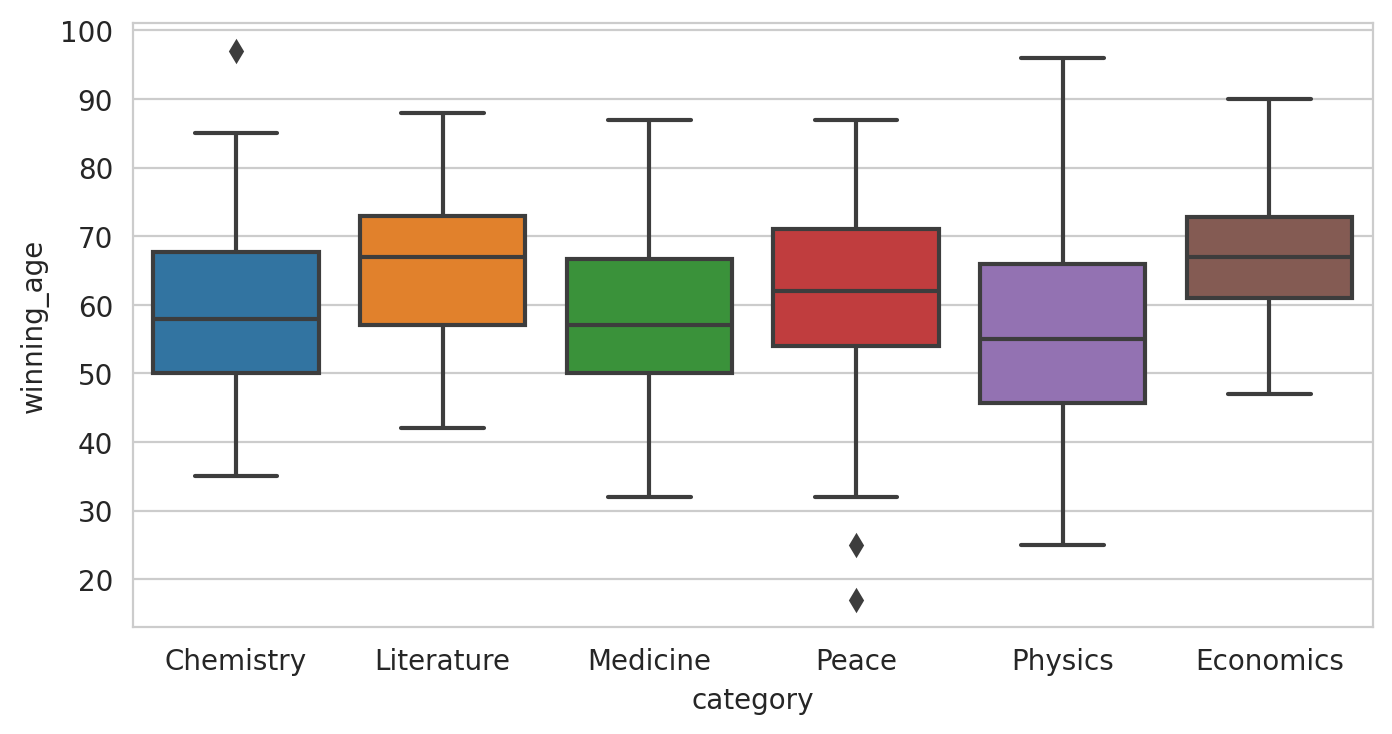

In [83]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
  
plt.show()

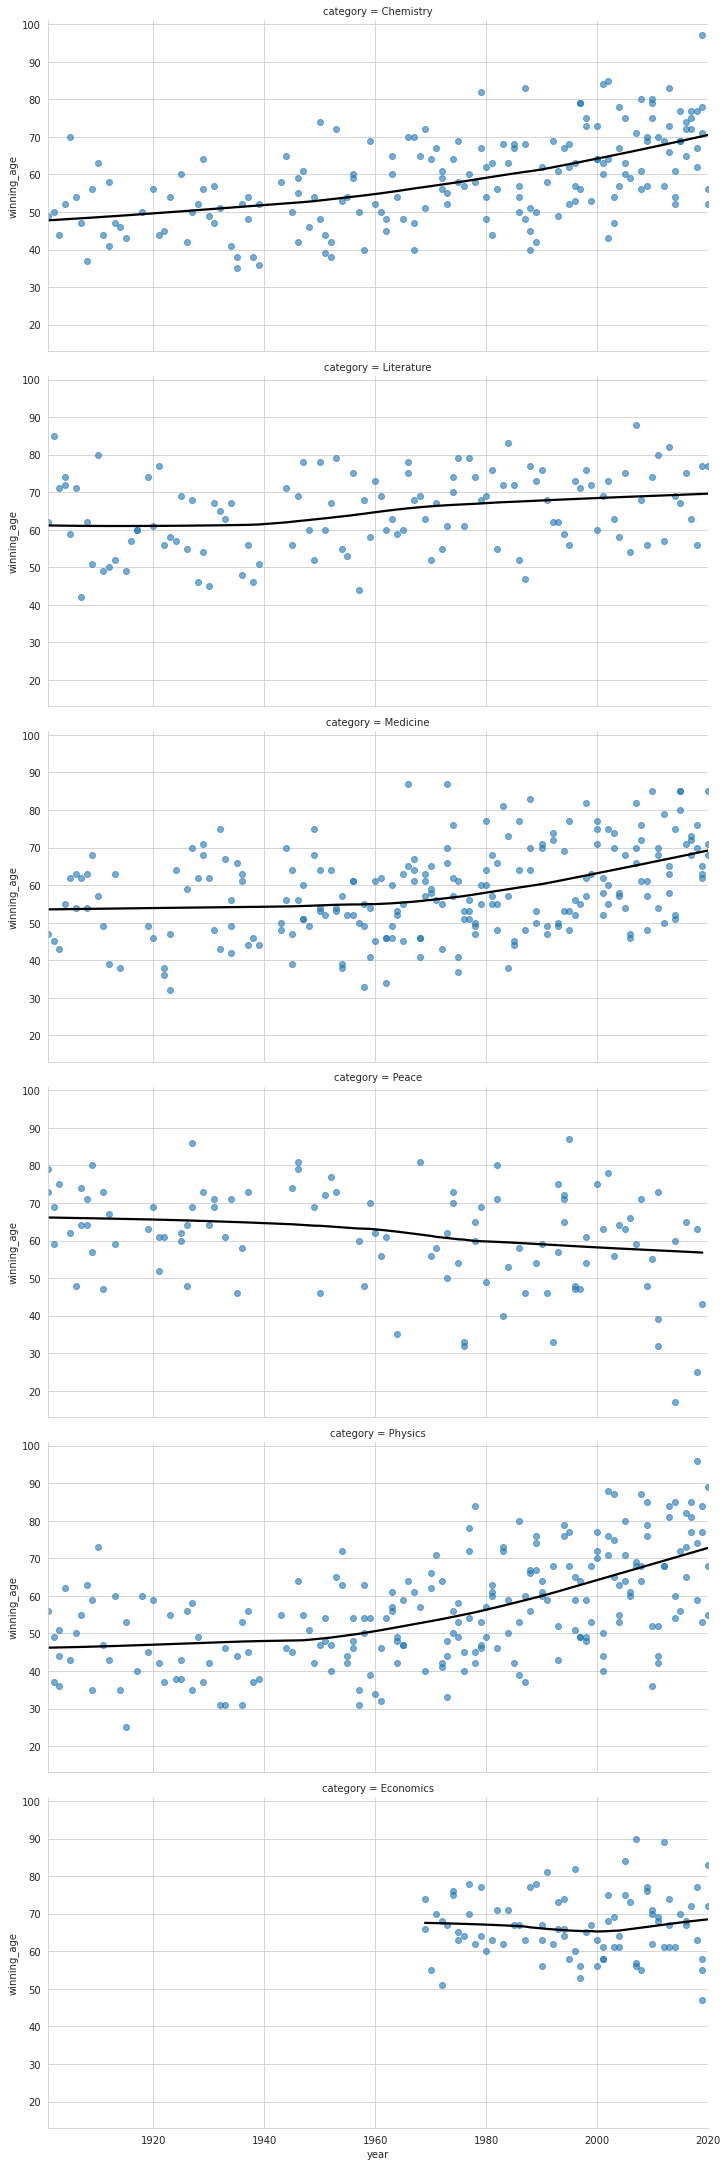

In [84]:
    with sns.axes_style('whitegrid'):
        sns.lmplot(data=df_data,
                   x='year', 
                   y='winning_age',
                   row = 'category',
                   lowess=True, 
                   aspect=2,
                   scatter_kws = {'alpha': 0.6},
                   line_kws = {'color': 'black'},)
     
    plt.show()

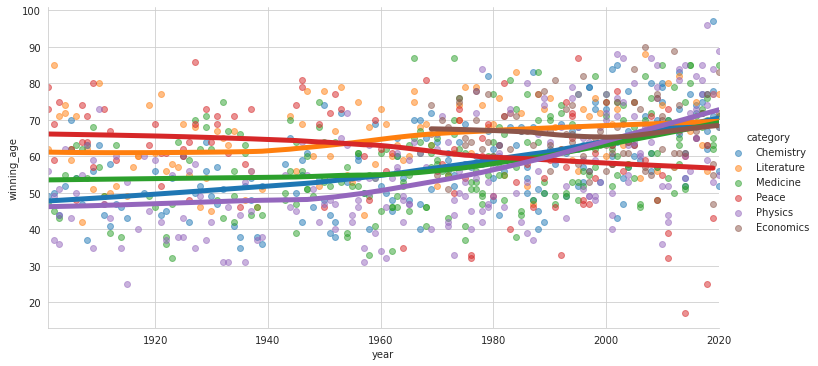

In [85]:
    with sns.axes_style("whitegrid"):
        sns.lmplot(data=df_data,
                   x='year',
                   y='winning_age',
                   hue='category',
                   lowess=True, 
                   aspect=2,
                   scatter_kws={'alpha': 0.5},
                   line_kws={'linewidth': 5})
     
    plt.show()